# Loan Approval Prediction

### 🎯 Objective:
To build a machine learning model that predicts whether a loan application will be approved or not based on applicant and loan-related features.

In [34]:
# Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings 
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

%matplotlib inline
sns.set(style="whitegrid")


In [2]:
# Load Datset 
df_train = pd.read_csv("C:/Users/PC/Downloads/archive/loan-train.csv")
df_test = pd.read_csv("C:/Users/PC/Downloads/archive/loan-test.csv")
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Data Overview

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df_train.shape

(614, 13)

In [5]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df_train.duplicated().sum()

0

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Fill missing values using mode or median
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True)
df_train['LoanAmount'].fillna(df_train['LoanAmount'].median(), inplace=True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace=True)

# Predictive imputation for Credit_History
# Split data
known_credit = df_train[df_train['Credit_History'].notnull()]
unknown_credit = df_train[df_train['Credit_History'].isnull()]

# Features used to predict Credit_History
features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
X_train = known_credit[features]
y_train = known_credit['Credit_History']
X_test = unknown_credit[features]

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and fill missing values
predicted_credit = rf.predict(X_test)
df_train.loc[df_train['Credit_History'].isnull(), 'Credit_History'] = predicted_credit

# Check that all missing values are handled
print("Missing values after imputation:\n", df_train.isnull().sum())


Missing values after imputation:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


## Exploratory Data Analysis (EDA)

#### 🎯 Goal
Understand relationships in the data, detect patterns, and uncover useful insights that will guide feature engineering and model building.

📊 Key EDA Tasks We'll Cover:
- Target variable distribution (Loan_Status)
- Categorical features vs. Loan_Status
- Numerical feature distributions
- Correlations & interactions


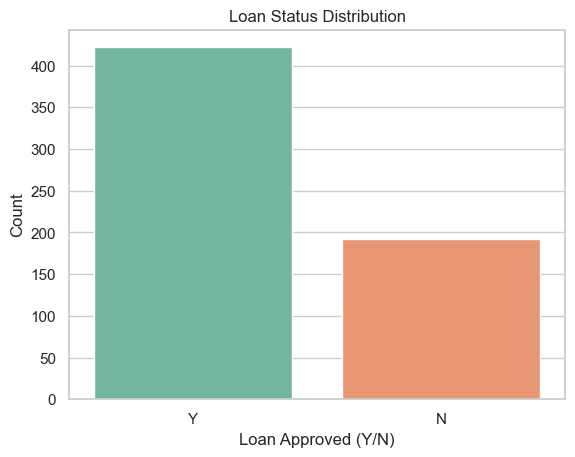

In [8]:
# Target Variable Distribution
sns.countplot(data=df_train, x='Loan_Status', palette='Set2')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Approved (Y/N)')
plt.ylabel('Count')
plt.show()

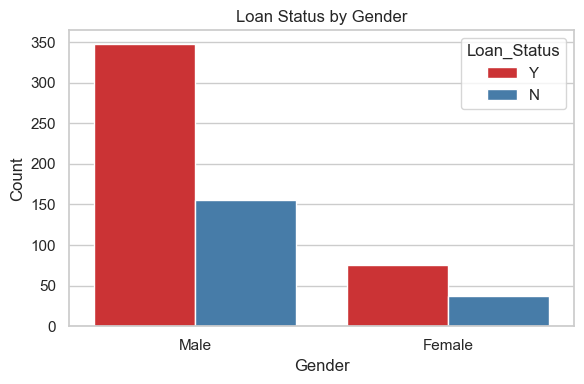

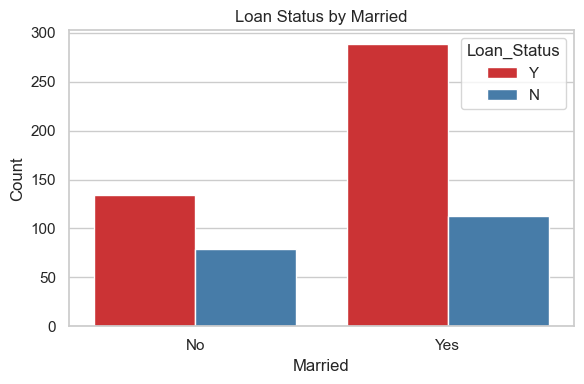

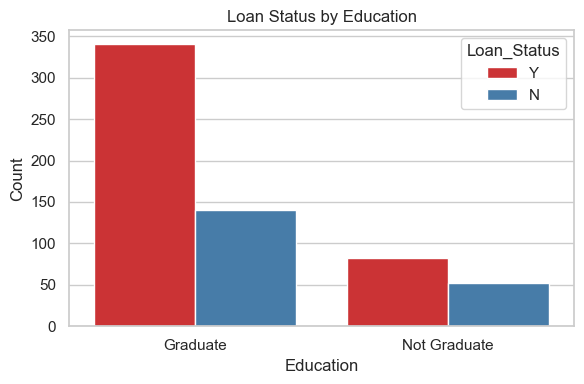

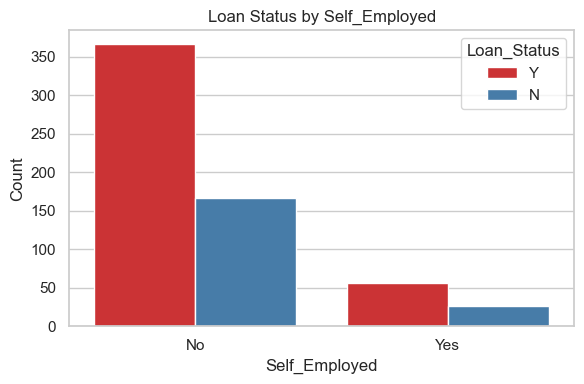

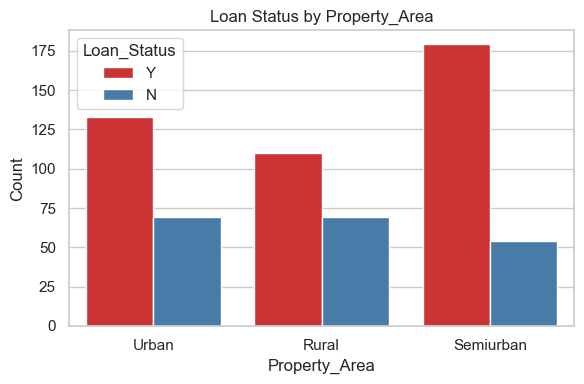

In [9]:
# Categorical Features vs. Loan Status
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_train, x=col, hue='Loan_Status', palette='Set1')
    plt.title(f'Loan Status by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.legend(title='Loan_Status')
    plt.tight_layout()
    plt.show()


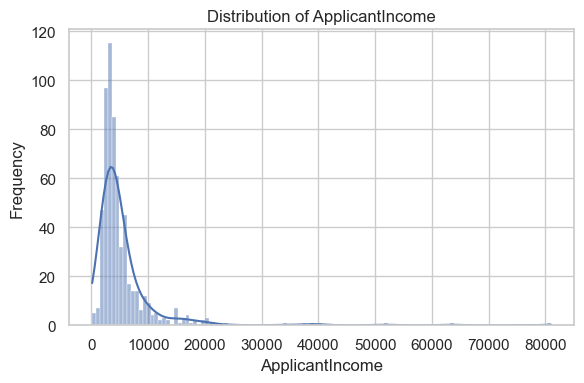

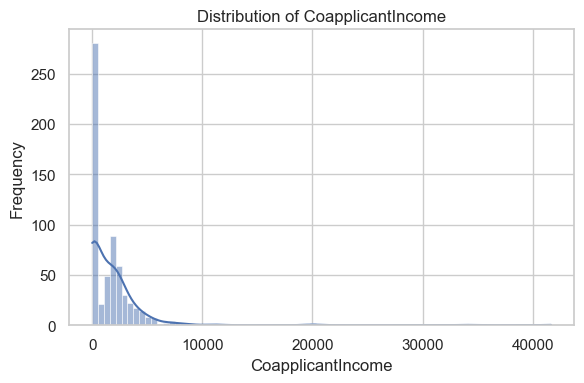

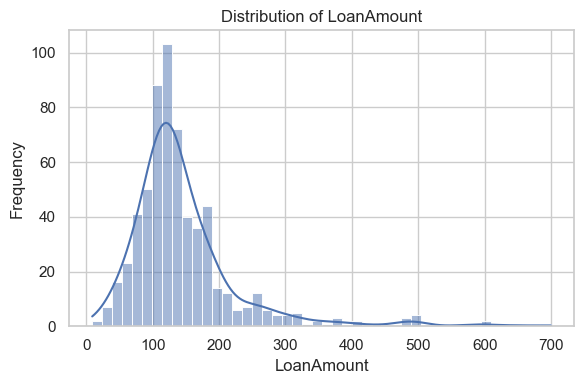

In [10]:
# Numerical Feature Distributions 
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

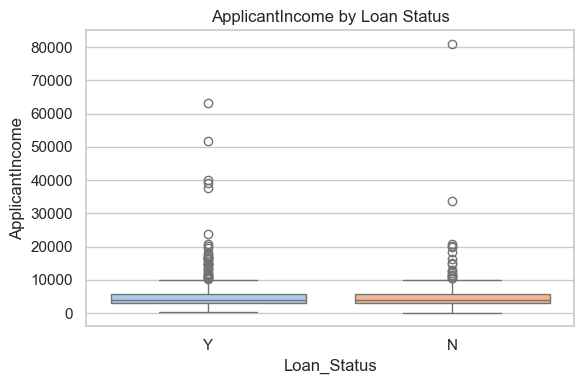

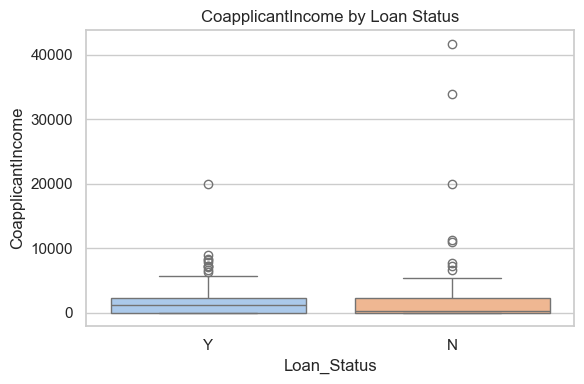

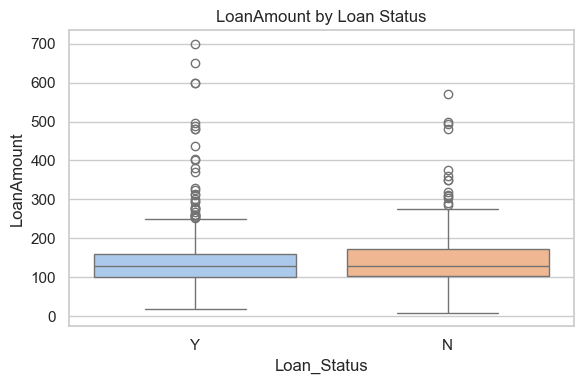

In [11]:
# Boxplots by Loan Status
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_train, x='Loan_Status', y=col, palette='pastel')
    plt.title(f'{col} by Loan Status')
    plt.tight_layout()
    plt.show()


#### Correlation Heatmap

#### Why is it important?
- Identifies strong linear relationships between numeric features.
- Helps avoid multicollinearity in modeling.
- Reveals which features may be predictive of Loan_Status (after encoding).

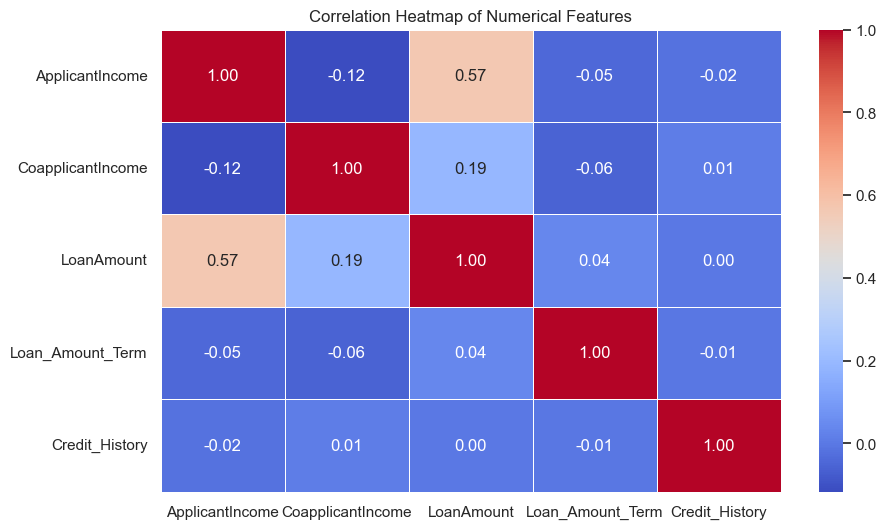

In [12]:
corr_matrix = df_train.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## Feature Engineering & Encoding

#### 🎯 Goal:
Prepare the dataset so that machine learning models can understand it. This involves:

- Converting categories to numbers
- Creating new features if useful
- Dropping or simplifying columns

##### Encode Target Variable 

In [13]:
# Convert Loan_Status: Y -> 1, N -> 0
df_train['Loan_Status'] = df_train['Loan_Status'].map({'Y': 1, 'N': 0})


##### Encode Categorical Features

In [14]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
cat_cols = ['Gender', 'Married', 'Dependents', 'Education',
            'Self_Employed', 'Property_Area']

le = LabelEncoder()
for col in cat_cols:
    df_train[col] = le.fit_transform(df_train[col])


Create a Total_Income feature and log transform skewed data

In [15]:
# Create Total Income
df_train['Total_Income'] = df_train['ApplicantIncome'] + df_train['CoapplicantIncome']

# Log transformation to reduce skewness
df_train['LoanAmount_log'] = np.log1p(df_train['LoanAmount'])
df_train['Total_Income_log'] = np.log1p(df_train['Total_Income'])


##### Drop Redundant Columns 

In [16]:
df_train.drop(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 
         'LoanAmount', 'Total_Income'], axis=1, inplace=True)

## Prepare Data for Modeling

##### Separate Features & Target
We’ll separate the target (Loan_Status) from the features:

In [17]:
# Check if the test dataset includes target variable 
print(df_test.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [18]:
# Features and target
X_train = df_train.drop('Loan_Status', axis=1)
y_train = df_train['Loan_Status']

X_test = df_test.copy()  # No y_test available 

## Model Training
Let’s train two models for comparison:
- Logistic Regression
- Random Forest Classifier

We'll also evaluate using accuracy and classification report.

In [19]:
# Drop rows with missing target variable
df_train = df_train.dropna(subset=['Loan_Status'])

# Re-split after cleaning
X = df_train.drop(columns=['Loan_Status'])
y = df_train['Loan_Status']

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
) 

In [25]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_val)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_val)

Evaluate Model Performance

In [26]:
# Logistic Regression Evaluation
print("🔹 Logistic Regression Accuracy:", accuracy_score(y_val, lr_preds))
print("\nLogistic Regression Report:\n", classification_report(y_val, lr_preds))

# Random Forest Evaluation
print("🔸 Random Forest Accuracy:", accuracy_score(y_val, rf_preds))
print("\nRandom Forest Report:\n", classification_report(y_val, rf_preds))

🔹 Logistic Regression Accuracy: 0.8536585365853658

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123

🔸 Random Forest Accuracy: 0.8211382113821138

Random Forest Report:
               precision    recall  f1-score   support

           0       0.77      0.61      0.68        38
           1       0.84      0.92      0.88        85

    accuracy                           0.82       123
   macro avg       0.80      0.76      0.78       123
weighted avg       0.82      0.82      0.81       123



#### Insights:
- Logistic Regression has better overall accuracy and F1-scores, especially for predicting approved loans (1).
- It struggles with predicting rejected loans (0), with a recall of just 0.55.
- Random Forest is more balanced but slightly weaker overall in this case.

We will plot ROC AUC and confusion matrices to confirm visually.

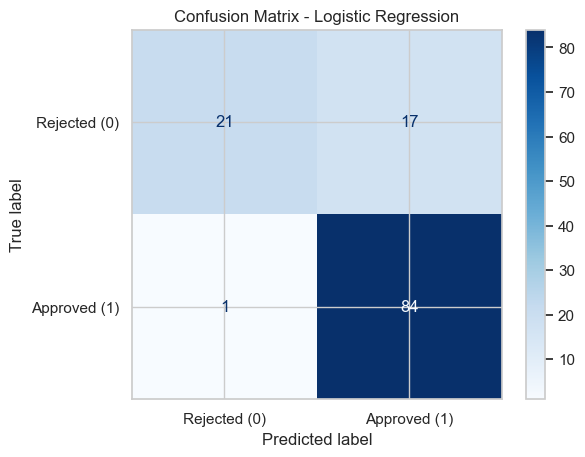

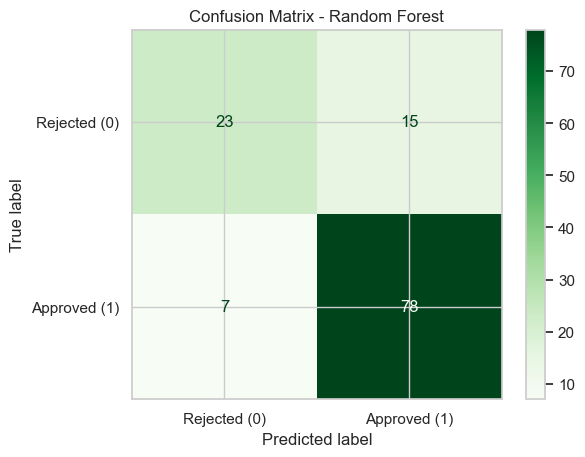

In [27]:
# Confusion Matrices 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression
cm_lr = confusion_matrix(y_val, lr_preds)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=["Rejected (0)", "Approved (1)"])
disp_lr.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Random Forest
cm_rf = confusion_matrix(y_val, rf_preds)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Rejected (0)", "Approved (1)"])
disp_rf.plot(cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.show()


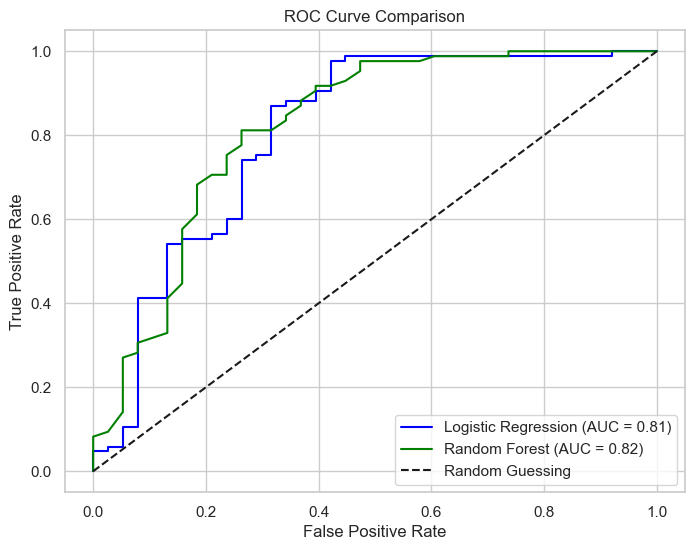

In [28]:
# ROC Curve & AUC 
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
lr_probs = lr_model.predict_proba(X_val)[:, 1]
rf_probs = rf_model.predict_proba(X_val)[:, 1]

# Compute ROC curve and AUC
fpr_lr, tpr_lr, _ = roc_curve(y_val, lr_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_val, rf_probs)

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
# Save the trained Random Forest model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)


## Prediction 

In [29]:
# Encode categorical features
from sklearn.preprocessing import LabelEncoder

cat_cols = ['Gender', 'Married', 'Dependents', 'Education',
            'Self_Employed', 'Property_Area']

le = LabelEncoder()
for col in cat_cols:
    df_test[col] = le.fit_transform(df_test[col])

# Create Total_Income and log transformations
df_test['Total_Income'] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']
df_test['LoanAmount_log'] = np.log1p(df_test['LoanAmount'])
df_test['Total_Income_log'] = np.log1p(df_test['Total_Income'])

# Drop unused columns (same as in training)
X_final_test = df_test.drop(columns=[
    'Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_Income'
])


In [30]:
# Predict using Random Forest
test_preds = rf_model.predict(X_final_test)


### Save

In [31]:
# Map 1 -> 'Y' (Approved), 0 -> 'N' (Rejected)
test_preds_labels = ['Y' if pred == 1 else 'N' for pred in test_preds]


In [32]:
submission_df = pd.DataFrame({
    'Loan_ID': df_test['Loan_ID'],
    'Loan_Status': test_preds_labels
})

In [33]:
submission_df.to_csv('loan_predictions_rf.csv', index=False)
print("✅ Predictions saved to 'loan_predictions_rf.csv'")


✅ Predictions saved to 'loan_predictions_rf.csv'
